In [1]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
from ultralytics import YOLO

# Helper functions

In [3]:
from helper_functions import set_logging, model_predict

In [4]:
def display_sample_images(train_folder, validation_folder, n_samples=5):
    train_images = [os.path.join(train_folder, f) for f in os.listdir(train_folder) if f.endswith(("jpg", "jpeg", "png"))]
    validation_images = [os.path.join(validation_folder, f) for f in os.listdir(validation_folder) if f.endswith(("jpg", "jpeg", "png"))]
    
    train_samples = random.sample(train_images, min(n_samples, len(train_images)))
    validation_samples = random.sample(validation_images, min(n_samples, len(validation_images)))
    
    fig, axs = plt.subplots(2, n_samples, figsize=(n_samples * 3, 6))
    fig.suptitle("Sample Images from Train and Validation Sets", fontsize=16)
    
    for i, img_path in enumerate(train_samples):
        img = Image.open(img_path)
        axs[0, i].imshow(img)
        axs[0, i].axis("off")
        axs[0, i].set_title("Train")

    for i, img_path in enumerate(validation_samples):
        img = Image.open(img_path)
        axs[1, i].imshow(img)
        axs[1, i].axis("off")
        axs[1, i].set_title("Validation")

    plt.show()

# Pre-trained YOLO model test

In [5]:
model = YOLO("yolo11m.pt")

100%|██████████| 38.8M/38.8M [00:00<00:00, 65.9MB/s]


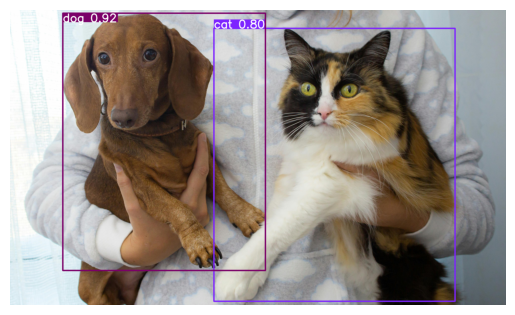

In [6]:
_ = model_predict(model, "test_img.jpg", show_pred=True)

# Food images

In [7]:
train_imgs_path = "images/train"
validation_imgs_path = "images/validation"

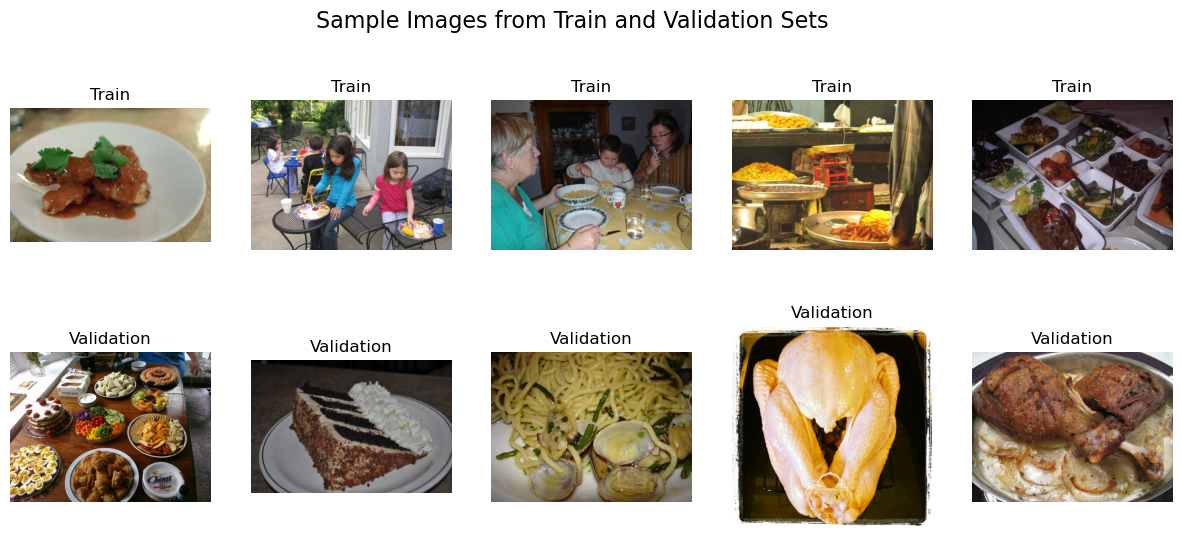

In [8]:
display_sample_images(train_imgs_path, validation_imgs_path, n_samples=5)

# Fine-tuning YOLO nano

In [9]:
model_nano = YOLO("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 33.7MB/s]


In [10]:
results = model_nano.train(
    data="food_dataset.yaml",
    epochs=50,
    batch=32,
    imgsz=640,
    project="runs/train",
    name="food_detection_yolo11_nano",
    # mps - poor mAP score with mps device (caused by parallel processing in ultralytics)
    device="cpu",
    exist_ok=True,  # overwrite result folder
    # workers=4,
)

Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.2.2 CPU (Apple M1 Pro)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=food_dataset.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=runs/train, name=food_detection_yolo11_nano, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

train: Scanning /Users/kkozik/Desktop/Computer Science studies/Image Patterns Recognition/lab4/labels/train.cache... 5831 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5831/5831 [00:00<?, ?it/s]
val: Scanning /Users/kkozik/Desktop/Computer Science studies/Image Patterns Recognition/lab4/labels/validation.cache... 1274 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1274/1274 [00:00<?, ?it/s]


Plotting labels to runs/train/food_detection_yolo11_nano/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/train/food_detection_yolo11_nano
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G       1.51      2.834      1.503         26        640: 100%|██████████| 183/183 [42:14<00:00, 13.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:31<00:00,  7.58s/it]

                   all       1274       2000      0.336      0.227      0.191     0.0893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.723      2.532      1.658         11        640: 100%|██████████| 183/183 [42:07<00:00, 13.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:26<00:00,  7.33s/it]

                   all       1274       2000      0.469       0.35      0.328      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G       1.75      2.474      1.689         23        640: 100%|██████████| 183/183 [41:53<00:00, 13.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:28<00:00,  7.41s/it]

                   all       1274       2000      0.471      0.296      0.286       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.735      2.447      1.679         21        640: 100%|██████████| 183/183 [41:53<00:00, 13.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:27<00:00,  7.39s/it]

                   all       1274       2000      0.538      0.385      0.399      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.675       2.37      1.646         15        640: 100%|██████████| 183/183 [39:05<00:00, 12.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:28<00:00,  7.40s/it]

                   all       1274       2000      0.608      0.391      0.423       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.664      2.341      1.631         23        640: 100%|██████████| 183/183 [38:57<00:00, 12.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:26<00:00,  7.32s/it]

                   all       1274       2000      0.538      0.344      0.359      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.625      2.292      1.602         18        640: 100%|██████████| 183/183 [40:48<00:00, 13.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:25<00:00,  7.28s/it]

                   all       1274       2000      0.616      0.393      0.435      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.598      2.252      1.577         19        640: 100%|██████████| 183/183 [40:51<00:00, 13.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:26<00:00,  7.35s/it]

                   all       1274       2000       0.68      0.409      0.458      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.577       2.21       1.56         16        640: 100%|██████████| 183/183 [36:40<00:00, 12.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:26<00:00,  7.35s/it]

                   all       1274       2000      0.656      0.414      0.465       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.571      2.203      1.558         19        640: 100%|██████████| 183/183 [38:36<00:00, 12.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:27<00:00,  7.36s/it]

                   all       1274       2000      0.676      0.438      0.485      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.566      2.186      1.551         14        640: 100%|██████████| 183/183 [41:14<00:00, 13.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:26<00:00,  7.32s/it]

                   all       1274       2000      0.699      0.436      0.504      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.557      2.189      1.548          7        640: 100%|██████████| 183/183 [41:14<00:00, 13.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:27<00:00,  7.35s/it]

                   all       1274       2000      0.719      0.432      0.511      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.536      2.158      1.548         11        640: 100%|██████████| 183/183 [39:27<00:00, 12.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:27<00:00,  7.38s/it]

                   all       1274       2000      0.691      0.432      0.498      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.528      2.156       1.53         17        640: 100%|██████████| 183/183 [39:17<00:00, 12.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:26<00:00,  7.34s/it]

                   all       1274       2000      0.645      0.411      0.479      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.503      2.115      1.516         14        640: 100%|██████████| 183/183 [39:54<00:00, 13.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:29<00:00,  7.45s/it]

                   all       1274       2000      0.654       0.39      0.453      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.504      2.111      1.509         23        640: 100%|██████████| 183/183 [40:26<00:00, 13.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:25<00:00,  7.29s/it]

                   all       1274       2000      0.706      0.438       0.51       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G       1.49      2.087      1.508         25        640: 100%|██████████| 183/183 [40:45<00:00, 13.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:26<00:00,  7.35s/it]

                   all       1274       2000       0.71      0.446      0.517      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G       1.49      2.105      1.505         17        640: 100%|██████████| 183/183 [40:38<00:00, 13.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:25<00:00,  7.29s/it]

                   all       1274       2000      0.587      0.392       0.43      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.474      2.063      1.483         13        640: 100%|██████████| 183/183 [40:15<00:00, 13.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:27<00:00,  7.35s/it]

                   all       1274       2000       0.66      0.428      0.491      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.471      2.055      1.489         15        640: 100%|██████████| 183/183 [40:08<00:00, 13.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:26<00:00,  7.30s/it]

                   all       1274       2000      0.642      0.415      0.478        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.446      2.029      1.483         24        640: 100%|██████████| 183/183 [39:07<00:00, 12.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:26<00:00,  7.34s/it]

                   all       1274       2000      0.676       0.43      0.508      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.456      2.033      1.468         15        640: 100%|██████████| 183/183 [38:20<00:00, 12.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:28<00:00,  7.41s/it]

                   all       1274       2000      0.652      0.398      0.471      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.452      2.039      1.468         14        640: 100%|██████████| 183/183 [38:37<00:00, 12.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:27<00:00,  7.39s/it]

                   all       1274       2000      0.668      0.413      0.488      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.421          2      1.455         14        640: 100%|██████████| 183/183 [39:44<00:00, 13.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:26<00:00,  7.30s/it]

                   all       1274       2000      0.662      0.421      0.481        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.423      2.001       1.45         25        640: 100%|██████████| 183/183 [37:45<00:00, 12.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:26<00:00,  7.35s/it]

                   all       1274       2000      0.586      0.383      0.434      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.427      2.003      1.452         19        640: 100%|██████████| 183/183 [37:53<00:00, 12.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:26<00:00,  7.31s/it]

                   all       1274       2000       0.68      0.453      0.514      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.404      1.972      1.441         19        640: 100%|██████████| 183/183 [40:28<00:00, 13.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:26<00:00,  7.34s/it]

                   all       1274       2000      0.637      0.415      0.473      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.403      1.972       1.44         23        640: 100%|██████████| 183/183 [37:50<00:00, 12.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:26<00:00,  7.34s/it]

                   all       1274       2000      0.638      0.382      0.454      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.395      1.949      1.426         17        640: 100%|██████████| 183/183 [38:58<00:00, 12.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:26<00:00,  7.32s/it]

                   all       1274       2000      0.636      0.425      0.485      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.402       1.95      1.434         18        640: 100%|██████████| 183/183 [39:28<00:00, 12.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:25<00:00,  7.26s/it]

                   all       1274       2000      0.627      0.447      0.503      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.376      1.934      1.423         21        640: 100%|██████████| 183/183 [39:20<00:00, 12.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:26<00:00,  7.32s/it]

                   all       1274       2000      0.676      0.452      0.523      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.381      1.937      1.422         15        640: 100%|██████████| 183/183 [39:07<00:00, 12.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:26<00:00,  7.32s/it]

                   all       1274       2000      0.624       0.41      0.476      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.375      1.932      1.427         14        640: 100%|██████████| 183/183 [40:01<00:00, 13.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:27<00:00,  7.39s/it]

                   all       1274       2000      0.708      0.445      0.525      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.368      1.907      1.416         17        640: 100%|██████████| 183/183 [41:00<00:00, 13.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:27<00:00,  7.38s/it]

                   all       1274       2000      0.656       0.39      0.455      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.374      1.918      1.411         13        640: 100%|██████████| 183/183 [39:30<00:00, 12.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:27<00:00,  7.36s/it]

                   all       1274       2000      0.622      0.441        0.5      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G       1.35      1.896      1.411         22        640: 100%|██████████| 183/183 [38:56<00:00, 12.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:27<00:00,  7.35s/it]

                   all       1274       2000      0.664      0.447      0.522      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.349      1.886      1.399         18        640: 100%|██████████| 183/183 [38:21<00:00, 12.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:28<00:00,  7.42s/it]

                   all       1274       2000      0.682      0.432      0.507      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.353      1.872      1.399         10        640: 100%|██████████| 183/183 [40:17<00:00, 13.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:26<00:00,  7.32s/it]

                   all       1274       2000      0.596      0.458      0.507      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.326       1.86      1.388         18        640: 100%|██████████| 183/183 [41:02<00:00, 13.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:27<00:00,  7.36s/it]

                   all       1274       2000      0.597      0.441      0.497      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.322      1.841      1.382          8        640: 100%|██████████| 183/183 [40:27<00:00, 13.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:29<00:00,  7.45s/it]

                   all       1274       2000      0.606       0.44      0.497      0.334


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      1.355      1.946      1.421         12        640: 100%|██████████| 183/183 [40:15<00:00, 13.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:27<00:00,  7.37s/it]

                   all       1274       2000      0.647      0.449      0.512      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G       1.33      1.899      1.402          8        640: 100%|██████████| 183/183 [40:28<00:00, 13.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:26<00:00,  7.34s/it]

                   all       1274       2000      0.647      0.438      0.507      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      1.326      1.886      1.399          7        640: 100%|██████████| 183/183 [40:53<00:00, 13.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:26<00:00,  7.30s/it]

                   all       1274       2000      0.619      0.431      0.492      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G      1.316       1.88      1.389          8        640: 100%|██████████| 183/183 [40:53<00:00, 13.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:26<00:00,  7.31s/it]

                   all       1274       2000      0.624      0.433      0.495       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G      1.309      1.859      1.381         12        640: 100%|██████████| 183/183 [40:49<00:00, 13.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:26<00:00,  7.32s/it]

                   all       1274       2000      0.619      0.434      0.499      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G      1.292      1.842      1.382          8        640: 100%|██████████| 183/183 [40:16<00:00, 13.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:26<00:00,  7.33s/it]

                   all       1274       2000      0.617       0.43      0.498      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      1.286      1.826       1.37         11        640: 100%|██████████| 183/183 [40:38<00:00, 13.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:25<00:00,  7.27s/it]

                   all       1274       2000      0.614      0.445      0.506      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G      1.286       1.82       1.37          9        640: 100%|██████████| 183/183 [40:32<00:00, 13.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:26<00:00,  7.33s/it]

                   all       1274       2000      0.617      0.438      0.497      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      1.274      1.801      1.363         11        640: 100%|██████████| 183/183 [40:36<00:00, 13.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:25<00:00,  7.29s/it]

                   all       1274       2000      0.602      0.452      0.505      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G      1.272      1.799      1.362         10        640: 100%|██████████| 183/183 [40:57<00:00, 13.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:26<00:00,  7.32s/it]

                   all       1274       2000      0.614      0.451      0.508      0.345



50 epochs completed in 35.367 hours.
Optimizer stripped from runs/train/food_detection_yolo11_nano/weights/last.pt, 5.5MB
Optimizer stripped from runs/train/food_detection_yolo11_nano/weights/best.pt, 5.5MB

Validating runs/train/food_detection_yolo11_nano/weights/best.pt...
Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.2.2 CPU (Apple M1 Pro)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:15<00:00,  6.80s/it]


                   all       1274       2000      0.708      0.445      0.525      0.363
Speed: 0.6ms preprocess, 100.1ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/train/food_detection_yolo11_nano
